

# Differential Evolution Optimization of Polynomial Weights

This project aims to optimize the weights of a polynomial model using **Differential Evolution (DE)** to best fit a noisy dataset sampled from the function $\cos(x)$. The optimization minimizes the Root Mean Square Error (RMSE) between the polynomial model predictions and the noisy data.

### 1. **Polynomial Model Definition**

The polynomial model used here can be represented as:


$$f(x; w) = \sum_{i=0}^{n} w_i \cdot x^i$$


where:
- $f(x; w)$ is the model's predicted output for an input $x$,
- $w = [w_0, w_1, \dots, w_n]$ are the polynomial weights,
- $n$ is the degree of the polynomial.

### 2. **Objective: RMSE Minimization**

The **Root Mean Square Error (RMSE)** between the model's predictions $y_{\text{pred}}$ and the noisy observed data $y_{\text{noisy}}$ is calculated as:


$$\text{RMSE} = \sqrt{\frac{1}{N} \sum_{j=1}^{N} (y_{\text{pred}}(x_j) - y_{\text{noisy}}(x_j))^2}$$


where $N$ is the number of data points. The goal is to find $w$ that minimizes RMSE.

### 3. **Differential Evolution Algorithm**

The DE optimization iteratively refines a **population** of candidate solutions. Each individual in the population represents a potential weight vector $w$.

#### Parameters:
- **Mutation Factor (F):** Controls the scaling of the difference vector.
- **Crossover Rate (CR):** Probability of recombining components from mutation vectors with the original vector.

#### Algorithm Steps:

1. **Mutation**: For each candidate vector $w_i$, select three other vectors $w_{r1}, w_{r2}, w_{r3}$ and create a **mutation vector** as:

   
   $$\text{mutation} = w_{r1} + F \cdot (w_{r2} - w_{r3})$$
   

2. **Crossover**: Create a **trial vector** by combining elements from $w_i$ and the mutation vector based on the crossover rate $CR$:

  
   $$\text{trial}_j = 
   \begin{cases} 
      \text{mutation}_j & \text{if } \text{rand} < CR \\
      w_{i,j} & \text{otherwise}
   \end{cases}$$

3. **Selection**: Evaluate both the trial vector and the original vector. Replace $w_i$ with the trial vector if the trial vector yields a lower RMSE.
$$
w_i = 
\begin{cases} 
\text{trial}_i & \text{if } \text{RMSE}(\text{trial}_i) < \text{RMSE}(w_i) \\
w_i & \text{otherwise}
\end{cases}
$$

#### Termination:
After a fixed number of generations, the best vector (weights $w$) with the lowest RMSE is considered the optimal solution.

### 4. **Results and Visualization**

The optimized weights are used to generate a polynomial fit for the data. The optimization progress (RMSE over generations) and the final fit are visualized.

---

This readme mathematically details how Differential Evolution optimizes the polynomial weights to minimize the RMSE between the polynomial model and noisy observations. The DE approach and visual plots illustrate the model's fit to data and the efficacy of the DE optimization technique.

In [1]:
import numpy as np

# Define the initial population with provided vectors
population = np.array([
    [0.5, -0.7, 1.8, -1.5, 0.3, -0.2],
    [-1.4, 0.6, -2.3, 2.1, -0.4, 0.9],
    [1.1, -0.8, 2.4, -2.0, 0.5, 0.1],
    [2.5, -1.1, -1.5, 1.8, -0.6, 0.7],
    [-0.3, 2.0, -0.8, -1.2, 1.0, -0.4],
    [0.4, -1.6, 1.5, -1.0, 2.3, -0.5],
    [-0.9, 1.7, -1.9, 0.4, -2.1, 1.2],
    [1.2, -0.5, 0.3, 2.5, -1.3, 0.6],
    [-2.0, 1.0, -0.1, 1.9, 0.8, -1.5],
    [0.6, -2.3, 1.2, 0.5, -1.8, 0.3]
])

# Display the initial population
print("Initial Population of Vectors:")
for i, vector in enumerate(population, start=1):
    print(f"Vector {i}: {vector}")


Initial Population of Vectors:
Vector 1: [ 0.5 -0.7  1.8 -1.5  0.3 -0.2]
Vector 2: [-1.4  0.6 -2.3  2.1 -0.4  0.9]
Vector 3: [ 1.1 -0.8  2.4 -2.   0.5  0.1]
Vector 4: [ 2.5 -1.1 -1.5  1.8 -0.6  0.7]
Vector 5: [-0.3  2.  -0.8 -1.2  1.  -0.4]
Vector 6: [ 0.4 -1.6  1.5 -1.   2.3 -0.5]
Vector 7: [-0.9  1.7 -1.9  0.4 -2.1  1.2]
Vector 8: [ 1.2 -0.5  0.3  2.5 -1.3  0.6]
Vector 9: [-2.   1.  -0.1  1.9  0.8 -1.5]
Vector 10: [ 0.6 -2.3  1.2  0.5 -1.8  0.3]


In [2]:
import numpy as np

# Define the polynomial model function
def polynomial_model(w, x):
    """Evaluate the polynomial model f_model(w, x) for given weights w and input x."""
    return sum(w[i] * x**i for i in range(len(w)))

# Define the RMSE calculation function
def calculate_rmse(y_true, y_pred):
    """Calculate the Root Mean Square Error between true values y_true and predicted values y_pred."""
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Example setup for testing: create some noisy data
# Generate x values and y values using a known function, y = cos(x) with Gaussian noise
np.random.seed(42)
x_values = np.linspace(-5, 5, 50)  # 50 points from -5 to 5
y_true = np.cos(x_values)           # True values without noise
noise = np.random.normal(0, 0.1, x_values.shape)  # Gaussian noise with mean=0 and std=0.1
y_noisy = y_true + noise            # Observed noisy data

# Calculate RMSE for each vector in the initial population against the noisy data
for i, w in enumerate(population, start=1):
    # Predict y values for current weights
    y_pred = np.array([polynomial_model(w, x) for x in x_values])
    # Calculate RMSE
    rmse = calculate_rmse(y_noisy, y_pred)
    print(f"RMSE for Vector {i}: {rmse}")


RMSE for Vector 1: 296.74319914649516
RMSE for Vector 2: 1045.6545997786877
RMSE for Vector 3: 142.55910908458497
RMSE for Vector 4: 826.3321930913968
RMSE for Vector 5: 516.832535580184
RMSE for Vector 6: 783.6254150765168
RMSE for Vector 7: 1362.9558742001898
RMSE for Vector 8: 798.6528010225762
RMSE for Vector 9: 1473.4903906053555
RMSE for Vector 10: 512.4844116814825



Generation 1
Vector 1 Mutation Vector: [ 1.8  -4.3   2.08  3.46 -3.64  1.1 ]
Vector 1 Trial Vector after Crossover: [ 1.8  -4.3   2.08  3.46 -3.64  1.1 ]
  Vector 1 unchanged (RMSE: 274.9272)
Vector 2 Mutation Vector: [ 0.1   3.2   0.16 -3.2   2.84 -0.56]
Vector 2 Trial Vector after Crossover: [-1.4   0.6   0.16  2.1   2.84  0.9 ]
  Vector 2 unchanged (RMSE: 961.7890)
Vector 3 Mutation Vector: [-0.94  1.12  0.16 -4.    3.88 -1.28]
Vector 3 Trial Vector after Crossover: [-0.94  1.12  2.4  -4.    3.88 -1.28]
  Vector 3 unchanged (RMSE: 133.8726)
Vector 4 Mutation Vector: [ 2.   -3.6   4.94 -2.92  4.38 -1.38]
Vector 4 Trial Vector after Crossover: [ 2.   -3.6  -1.5  -2.92  4.38 -1.38]
  Vector 4 unchanged (RMSE: 760.2565)
Vector 5 Mutation Vector: [ 1.66 -0.64  1.2   1.2  -0.78  0.74]
Vector 5 Trial Vector after Crossover: [-0.3  -0.64  1.2  -1.2  -0.78  0.74]
  Vector 5 unchanged (RMSE: 476.3351)
Vector 6 Mutation Vector: [-3.   -0.62  2.32  0.58 -0.68 -1.46]
Vector 6 Trial Vector after

Vector 8 Mutation Vector: [18.89432912 -8.15958584 -3.43151762  0.37107548  0.18031568  0.03809982]
Vector 8 Trial Vector after Crossover: [-0.1922942  -8.15958584 -3.43151762  0.37107548  0.18031568  0.03809982]
  Vector 8 unchanged (RMSE: 34.7010)
Vector 9 Mutation Vector: [ 2.20084857e+00  9.36502371e+00 -1.24255943e-01 -2.12238396e+00
 -1.45040628e-03  7.60264661e-02]
Vector 9 Trial Vector after Crossover: [ 0.2870888   9.36502371 -0.12425594 -0.37543526  0.175942    0.07602647]
  Vector 9 unchanged (RMSE: 16.4641)
Vector 10 Mutation Vector: [24.52421391 -1.963613   -0.94532266 -0.32543912 -0.06022274  0.03315781]
Vector 10 Trial Vector after Crossover: [24.52421391  5.96784608 -0.94532266 -0.32543912 -0.06022274  0.03315781]
  Vector 10 unchanged (RMSE: 33.5243)

Generation 60
Vector 1 Mutation Vector: [ 1.57330737e+01 -1.45080577e+00  4.20584788e+00  8.02598420e-01
 -2.58162063e-01 -4.66784571e-03]
Vector 1 Trial Vector after Crossover: [ 1.57330737e+01 -1.45080577e+00 -3.0003271

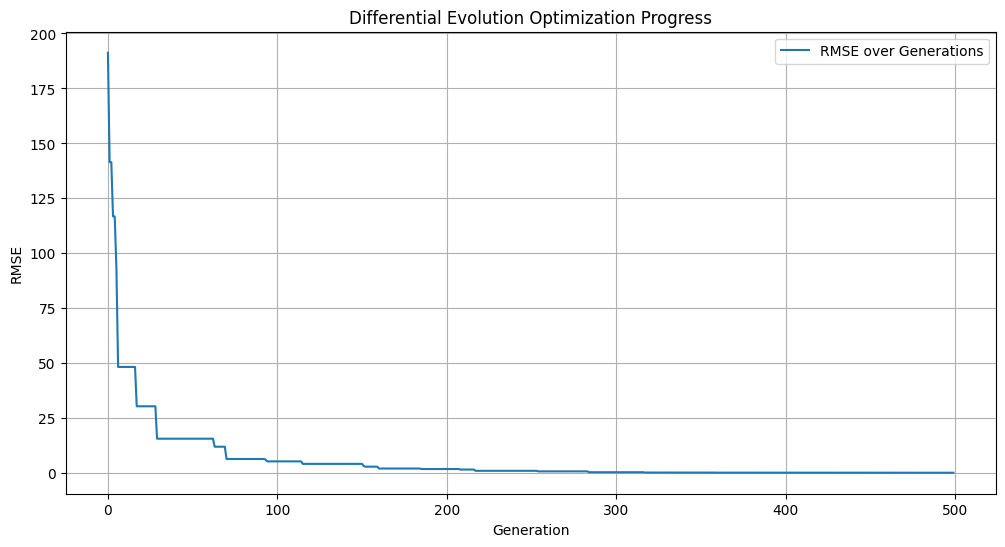

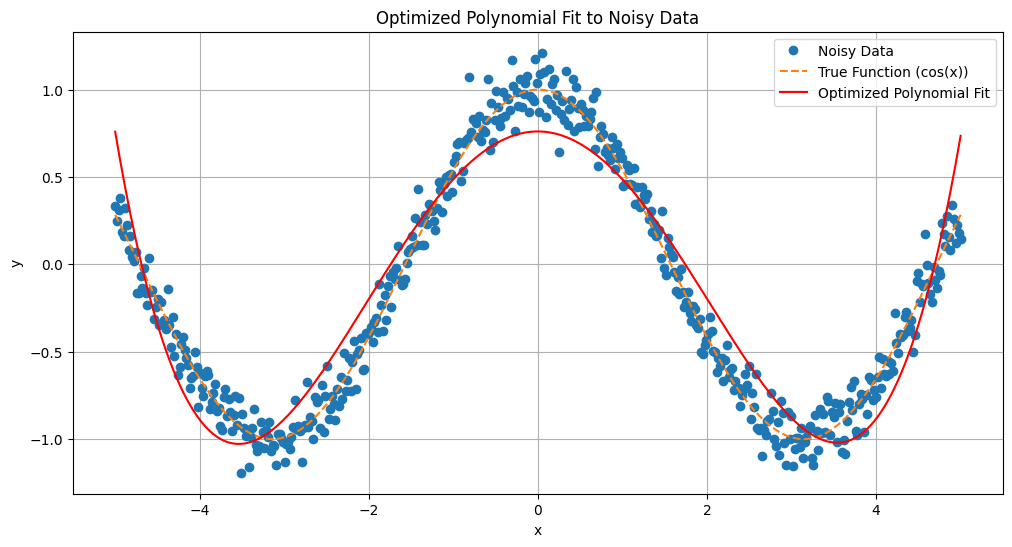


DE optimization steps have been saved to DE_optimization_steps.txt.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial population with provided vectors
population = np.array([
    [0.5, -0.7, 1.8, -1.5, 0.3, -0.2],
    [-1.4, 0.6, -2.3, 2.1, -0.4, 0.9],
    [1.1, -0.8, 2.4, -2.0, 0.5, 0.1],
    [2.5, -1.1, -1.5, 1.8, -0.6, 0.7],
    [-0.3, 2.0, -0.8, -1.2, 1.0, -0.4],
    [0.4, -1.6, 1.5, -1.0, 2.3, -0.5],
    [-0.9, 1.7, -1.9, 0.4, -2.1, 1.2],
    [1.2, -0.5, 0.3, 2.5, -1.3, 0.6],
    [-2.0, 1.0, -0.1, 1.9, 0.8, -1.5],
    [0.6, -2.3, 1.2, 0.5, -1.8, 0.3]
]) 

# Define the polynomial model function
def polynomial_model(w, x):
    """Evaluate the polynomial model f_model(w, x) for given weights w and input x."""
    return sum(w[i] * x**i for i in range(len(w)))

# Define the RMSE calculation function
def calculate_rmse(y_true, y_pred):
    """Calculate the Root Mean Square Error between true values y_true and predicted values y_pred."""
    return np.sqrt(np.mean((y_true - y_pred)**2))

# Example setup for testing: create some noisy data
np.random.seed(42)
x_values = np.linspace(-5, 5, 500)  # 50 points from -5 to 5
y_true = np.cos(x_values)           # True values without noise
noise = np.random.normal(0, 0.1, x_values.shape)  # Gaussian noise with mean=0 and std=0.1
y_noisy = y_true + noise            # Observed noisy data

# DE Parameters
F = 0.8       # Mutation factor
CR = 0.7      # Crossover rate
num_generations = 500  # Number of iterations

# File to save the results
output_file = "DE_optimization_steps.txt"

# Differential Evolution function
def differential_evolution(population, x_values, y_noisy, F, CR, num_generations, output_file):
    """Optimize the polynomial weights using Differential Evolution, saving each step's data to a file."""
    population_size, num_weights = population.shape
    best_rmse = float('inf')
    best_vector = None
    rmse_progress = []

    with open(output_file, "w") as f:
        for generation in range(num_generations):
            f.write(f"\n--- Generation {generation + 1} ---\n")
            print(f"\nGeneration {generation + 1}")
            
            new_population = population.copy()  # Placeholder for the new generation

            for i in range(population_size):
                # Select three random vectors that are different from the current vector i
                indices = [idx for idx in range(population_size) if idx != i]
                rand1, rand2, rand3 = population[np.random.choice(indices, 3, replace=False)]
                diff = rand2 - rand3

                # Mutation
                mutation_vector = rand1 + F * diff
                f.write(f"\nVector {i + 1} Mutation Step:\n  Target Vector: {population[i]}\n  Random Vectors: rand1={rand1}, rand2={rand2}, rand3={rand3}\n  Difference: {diff}\n  Scaled Mutation Vector: {mutation_vector}\n")
                print(f"Vector {i + 1} Mutation Vector: {mutation_vector}")

                # Crossover
                trial_vector = np.array([
                    mutation_vector[j] if np.random.rand() < CR else population[i, j]
                    for j in range(num_weights)
                ])
                f.write(f"Vector {i + 1} Crossover Step:\n  Trial Vector: {trial_vector}\n")
                print(f"Vector {i + 1} Trial Vector after Crossover: {trial_vector}")

                # Evaluate trial vector and target vector
                y_pred_trial = np.array([polynomial_model(trial_vector, x) for x in x_values])
                y_pred_target = np.array([polynomial_model(population[i], x) for x in x_values])
                rmse_trial = calculate_rmse(y_noisy, y_pred_trial)
                rmse_target = calculate_rmse(y_noisy, y_pred_target)

                # Selection
                if rmse_trial < rmse_target:
                    new_population[i] = trial_vector  # Replace target vector with trial vector
                    f.write(f"Vector {i + 1} Selection Step: Replacing Target Vector with Trial Vector\n")
                    print(f"  Vector {i + 1} | RMSE improved: {rmse_target:.4f} -> {rmse_trial:.4f}")
                else:
                    f.write(f"Vector {i + 1} Selection Step: Retaining Target Vector (RMSE: {rmse_target:.4f})\n")
                    print(f"  Vector {i + 1} unchanged (RMSE: {rmse_target:.4f})")

                # Track the best solution
                if rmse_trial < best_rmse:
                    best_rmse = rmse_trial
                    best_vector = trial_vector

            population = new_population
            rmse_progress.append(best_rmse)

    return best_vector, rmse_progress

# Run DE optimization and save results
best_vector, rmse_progress = differential_evolution(population, x_values, y_noisy, F, CR, num_generations, output_file)

# Display the optimized weights and final RMSE
print("\nOptimized Weights (w0 to w5) that minimize RMSE:")
print(best_vector)
print("\nFinal RMSE:", min(rmse_progress))

# Save Optimized Weights to txt file
with open("DE_optimized_weights.txt", "w") as f:
    f.write("Optimized Weights (w0 to w5) that minimize RMSE:\n")
    f.write(str(best_vector))
    f.write("\n\nFinal RMSE: " + str(min(rmse_progress)))
    f.close()


# Plot the f_model 


# Plot RMSE progress over generations
plt.figure(figsize=(12, 6))
plt.plot(rmse_progress, label='RMSE over Generations')
plt.xlabel('Generation')
plt.ylabel('RMSE')
plt.title('Differential Evolution Optimization Progress')
plt.legend()
plt.grid(True)
plt.show()

# Plot the noisy data and the polynomial prediction with optimized weights
y_optimized_pred = np.array([polynomial_model(best_vector, x) for x in x_values])
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_noisy, 'o', label='Noisy Data')
plt.plot(x_values, y_true, label='True Function (cos(x))', linestyle='--')
plt.plot(x_values, y_optimized_pred, label='Optimized Polynomial Fit', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Optimized Polynomial Fit to Noisy Data')
plt.legend()
plt.grid(True)
plt.show()

print(f"\nDE optimization steps have been saved to {output_file}.")
